# Geospatial Crop Targeting System for Cambodia
## Data Science Workflow: Soil-Based Agricultural Zoning

**Project:** National Soil Information and Land Suitability Evaluation System  
**Objective:** Develop an evidence-based system for agricultural zone classification using geospatial data and machine learning.

---

## Workflow Overview

| Phase                        | Notebook Section / Cell | Key Methods & Actions                          |
|------------------------------|------------------------|------------------------------------------------|
| **1. Problem Definition**    | Introduction           | Define objectives, metrics, and context        |
| **2. Environment Setup**     | Cell 2                 | Import libraries, configure environment        |
| **3. Data Acquisition**      | Cells 3-5              | Load shapefile, crop production data           |
| **4. Exploratory Analysis**  | Cells 6-8              | Statistical summaries, distributions, EDA      |
| **5. Data Cleaning**         | Cell 9                 | Handle missing values, CRS alignment           |
| **6. Feature Engineering**   | Cells 10-11            | Rule-based classification, preprocessing       |
| **7. Data Integration**      | Cell 12                | Merge soil and crop datasets                   |
| **8. Visualization**         | Cells 13-15            | Distributions, correlations, heatmaps          |
| **9. Machine Learning**      | Cells 16-18            | K-Means clustering, evaluation, interpretation |
| **10. Advanced Mapping**     | Cells 19-21            | Interactive mapping, PCA, cross-analysis       |
| **11. Results Export**       | Cell 22                | Export results to CSV, GeoJSON, summary stats  |
| **12. Reporting**            | Cell 23                | Final report, insights, recommendations        |

## Environment Setup & Configuration

In [45]:
import pandas as pd
import numpy as np
from pathlib import Path
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

warnings.filterwarnings("ignore")

# visualization settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", 100)

##  2: Data Acquisition & Initial Loading

In [46]:
# Resolve data paths relative to repository root
notebook_dir = Path(".").resolve()
base_path = notebook_dir.parent if notebook_dir.name == "src" else notebook_dir

shapefile_path = base_path / "soil-type" / "ST.shp"
crop_prod_path = base_path / "dataset" / "crop_prod.csv"

# Load geospatial data
gdf_soil = gpd.read_file(shapefile_path, engine="pyogrio")
gdf_soil.rename(columns={"Name": "Soil_Type"}, inplace=True)

# Load crop production reference
df_crops_ref = pd.read_csv(crop_prod_path)

print(f"Geospatial data: {gdf_soil.shape[0]} polygons, CRS: {gdf_soil.crs}")
print(f"Crop reference data: {df_crops_ref.shape}")

Geospatial data: 17 polygons, CRS: EPSG:32648
Crop reference data: (66, 2)


In [47]:
gdf_soil.head(17)

Soil_Type  \
0              Acid Lithosols   
1          Alluvial Lithosols   
2                   Alumisols   
3             Basic Lithosols   
4        Brown Alluvial Soils   
5         Brown hydromorphics   
6             Coastal Complex   
7      Cultural hydromorphics   
8                  Great Lake   
9          Grey hydromorphics   
10  Lacustrine Alluvial Soils   
11                   Latosols   
12                  Planosols   
13          Plinthite podzols   
14   Plinthitic hydromorphics   
15         Red-yellow podzols   
16                     Regurs   

                                             geometry  
0   MULTIPOLYGON (((309750.552 1180936.462, 309963...  
1   MULTIPOLYGON (((496389.188 1529455.625, 498252...  
2   MULTIPOLYGON (((365599.094 1221113.125, 365302...  
3   MULTIPOLYGON (((653791.188 1369890.875, 654189...  
4   MULTIPOLYGON (((572065.688 1361206.5, 572596.6...  
5   MULTIPOLYGON (((281323.969 1485473, 281396.094...  
6   MULTIPOLYGON (((376224.404 1181316.102, 376112...  
7   MULTIPOLYGON (((464333.781 1318126.375, 463790...  
8   MULTIPOLYGON (((513125.526 1209414.304, 513160...  
9   MULTIPOLYGON (((377418.406 1399500.625, 377301...  
10  MULTIPOLYGON (((298032.5 1501304, 298619.219 1...  
11  MULTIPOLYGON (((742664.562 1538854.125, 743661...  
12  MULTIPOLYGON (((398223.688 1288956.125, 398755...  
13  MULTIPOLYGON (((256564.938 1521580.625, 256574...  
14  POLYGON ((697929.5 1374141.125, 697992.688 137...  
15  MULTIPOLYGON (((571029.812 1495932.25, 570879 ...  
16  MULTIPOLYGON (((270142.906 1525169.625, 270274...

In [48]:
df_crops_ref.head(15)

Tree_Plant_Type  Conversion_Factor_Per_Hectare
0               Oranges                            400
1            Tangerines                            400
2                Pomelo                            400
3            Lime/lemon                            400
4            Kafir lime                            400
5   Other citrus fruits                            400
6                Banana                           1667
7         Custard apple                            400
8               Soursop                            400
9                 Guava                            400
10               Longan                            278
11                Mango                            270
12               Papaya                           1600
13            Pineapple                          14000
14           Wood apple                            400

In [49]:
df_crops_ref.describe()

Conversion_Factor_Per_Hectare
count                      66.000000
mean                     2715.515152
std                      5722.781742
min                        70.000000
25%                       270.000000
50%                       400.000000
75%                      1575.000000
max                     25000.000000

## 3: Exploratory Data Analysis - Geospatial Data

Soil_Type                                           geometry
count               17                                                 17
unique              17                                                 17
top     Acid Lithosols  MULTIPOLYGON (((309750.55179999955 1180936.461...
freq                 1                                                  1

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Soil_Type  17 non-null     object  
 1   geometry   17 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 404.0+ bytes


None

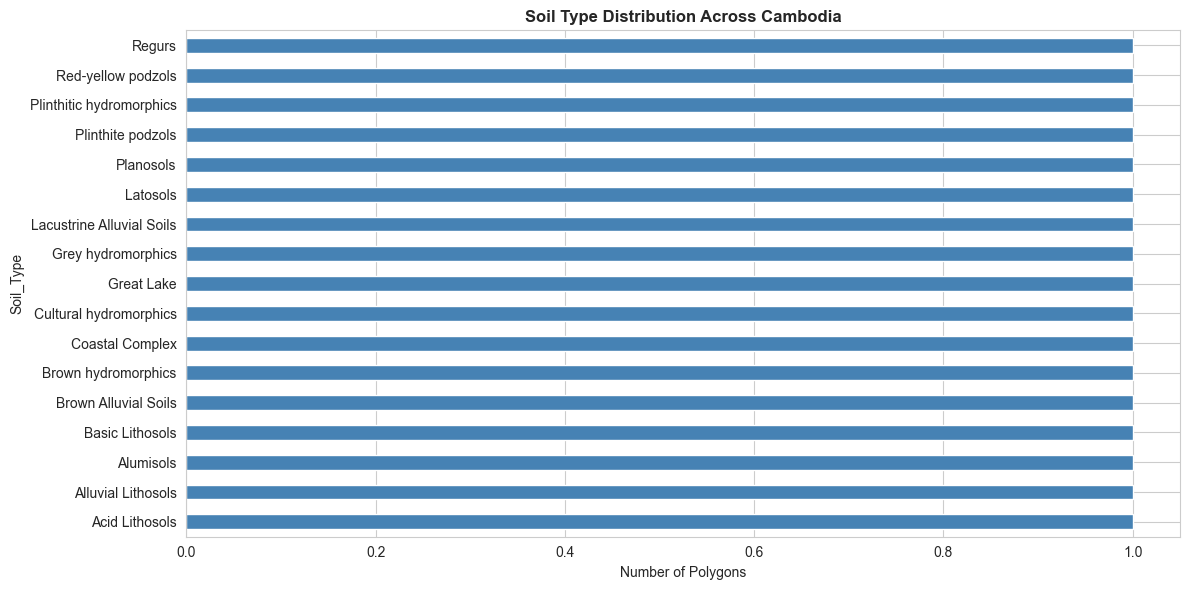

No missing values in geospatial dataset


In [50]:
# Display geospatial data overview
display(gdf_soil.describe())
display(gdf_soil.info())

# Soil type distribution
soil_counts = gdf_soil["Soil_Type"].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
soil_counts.plot(kind="barh", ax=ax, color="steelblue")
ax.set_title("Soil Type Distribution Across Cambodia", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Polygons")
plt.tight_layout()
plt.show()

# Check for missing values
missing_summary = gdf_soil.isnull().sum()
if missing_summary.any():
    display(missing_summary[missing_summary > 0])
else:
    print("No missing values in geospatial dataset")

## CELL 4: Data Cleaning - CRS Handling & Validation

In [51]:
# Validate and reproject CRS if necessary
if gdf_soil.crs != "EPSG:4326":
    print(f"Reprojecting from {gdf_soil.crs} to EPSG:4326 for web mapping...")
    gdf_soil = gdf_soil.to_crs("EPSG:4326")
    print(f"Reprojection complete. New CRS: {gdf_soil.crs}")

# Validate geometry
invalid_geom = gdf_soil[~gdf_soil.geometry.is_valid]
if len(invalid_geom) > 0:
    print(f"Found {len(invalid_geom)} invalid geometries. Fixing...")
    gdf_soil.geometry = gdf_soil.geometry.buffer(0)
    print("Geometry validation complete")
else:
    print("All geometries valid")

# Display final geospatial dataset
display(gdf_soil.head(1))
print(
    f"\nCleaned dataset: {gdf_soil.shape[0]} polygons, {len(gdf_soil.columns)} columns"
)

Reprojecting from EPSG:32648 to EPSG:4326 for web mapping...
Reprojection complete. New CRS: EPSG:4326
Found 1 invalid geometries. Fixing...
Geometry validation complete
Reprojection complete. New CRS: EPSG:4326
Found 1 invalid geometries. Fixing...
Geometry validation complete


Soil_Type                                           geometry
0  Acid Lithosols  MULTIPOLYGON (((107.62943 13.40398, 107.62603 ...


Cleaned dataset: 17 polygons, 2 columns


## 4.1: Load Cambodia Province Boundaries (GADM)

In [67]:
import pygadm

gdf_provinces_boundary = pygadm.get_items(admin="KHM", content_level=1)

# GADM data is in WGS84 (EPSG:4326) but may not have CRS set explicitly
if gdf_provinces_boundary.crs is None:
    gdf_provinces_boundary = gdf_provinces_boundary.set_crs("EPSG:4326")
# Standardize CRS to match soil data (already EPSG:4326 from previous cell)
if gdf_provinces_boundary.crs != gdf_soil.crs:
    gdf_provinces_boundary = gdf_provinces_boundary.to_crs(gdf_soil.crs)

print(f" Loaded {len(gdf_provinces_boundary)} provinces")
print(f"Province columns: {gdf_provinces_boundary.columns.tolist()}")

# Display province names from GADM - use .values to avoid pandas conflict
print("\nGADM Province Names (NAME_1):")
province_names = gdf_provinces_boundary["NAME_1"].sort_values().tolist()
for i, name in enumerate(province_names, 1):
    print(f"  {i}. {name}")

 Loaded 25 provinces
Province columns: ['geometry', 'GID_1', 'GID_0', 'NAME_0', 'NAME_1', 'VARNAME_1', 'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1']

GADM Province Names (NAME_1):
  1. Batdâmbâng
  2. Bântéay Méanchey
  3. Kaôh Kong
  4. Kep
  5. Krong Pailin
  6. Krong Preah Sihanouk
  7. Krâchéh
  8. Kâmpóng Cham
  9. Kâmpóng Chhnang
  10. Kâmpóng Spœ
  11. Kâmpóng Thum
  12. Kâmpôt
  13. Kândal
  14. Môndól Kiri
  15. Otdar Mean Chey
  16. Phnom Penh
  17. Pouthisat
  18. Preah Vihéar
  19. Prey Vêng
  20. Rôtânôkiri
  21. Siemréab
  22. Stœng Trêng
  23. Svay Rieng
  24. Takêv
  25. Tbong Khmum


In [68]:
# Perform spatial overlay: intersect soil polygons with province boundaries

print("Performing spatial intersection of soil polygons with province boundaries...")
print(f"Input: {len(gdf_soil)} soil polygons, {len(gdf_provinces_boundary)} provinces")

# WORKAROUND: Convert pygadm GeoDataFrame to standard GeoDataFrame to avoid conflicts
# Extract data and create new clean GeoDataFrame
provinces_data = {
    "Province_Name": gdf_provinces_boundary["NAME_1"].tolist(),
    "geometry": gdf_provinces_boundary.geometry.tolist(),
}
gdf_provinces_clean = gpd.GeoDataFrame(provinces_data, crs=gdf_provinces_boundary.crs)

# Also create clean soil GeoDataFrame
soil_data = {
    "Soil_Type": gdf_soil["Soil_Type"].tolist(),
    "geometry": gdf_soil.geometry.tolist(),
}
gdf_soil_clean = gpd.GeoDataFrame(soil_data, crs=gdf_soil.crs)

# Perform intersection - this creates sub-polygons where soil and province overlap
gdf_soil_with_provinces = gpd.overlay(
    gdf_soil_clean, gdf_provinces_clean, how="intersection", keep_geom_type=True
)

print(f" Output: {len(gdf_soil_with_provinces)} soil-province intersection polygons")
print(f"\nSample of intersected data (soil type + actual province):")
display(
    gdf_soil_with_provinces[["Soil_Type", "Province_Name"]].drop_duplicates().head(20)
)

# Show province distribution
print(f"\n Polygons per province (top 10):")
display(gdf_soil_with_provinces["Province_Name"].value_counts().head(10))

Performing spatial intersection of soil polygons with province boundaries...
Input: 17 soil polygons, 25 provinces
 Output: 198 soil-province intersection polygons

Sample of intersected data (soil type + actual province):
 Output: 198 soil-province intersection polygons

Sample of intersected data (soil type + actual province):


Soil_Type         Province_Name
0       Acid Lithosols      Bântéay Méanchey
1       Acid Lithosols            Batdâmbâng
2       Acid Lithosols       Kâmpóng Chhnang
3       Acid Lithosols           Kâmpóng Spœ
4       Acid Lithosols          Kâmpóng Thum
5       Acid Lithosols                Kâmpôt
6       Acid Lithosols             Kaôh Kong
7       Acid Lithosols                   Kep
8       Acid Lithosols               Krâchéh
9       Acid Lithosols          Krong Pailin
10      Acid Lithosols  Krong Preah Sihanouk
11      Acid Lithosols           Môndól Kiri
12      Acid Lithosols       Otdar Mean Chey
13      Acid Lithosols             Pouthisat
14      Acid Lithosols          Preah Vihéar
15      Acid Lithosols            Rôtânôkiri
16      Acid Lithosols              Siemréab
17      Acid Lithosols           Stœng Trêng
18      Acid Lithosols                 Takêv
19  Alluvial Lithosols      Bântéay Méanchey


 Polygons per province (top 10):


Province_Name
Bântéay Méanchey    11
Batdâmbâng          11
Kâmpóng Thum        11
Krâchéh             11
Kâmpôt              11
Kâmpóng Cham        10
Tbong Khmum         10
Kaôh Kong            9
Môndól Kiri          9
Preah Vihéar         9
Name: count, dtype: int64

## 5: Province-Level Data Engineering

In [54]:
# Create comprehensive province dataset with synthetic crop production data in 24 provinces
provinces_cambodia = [
    "Banteay Meanchey",
    "Battambang",
    "Kampong Cham",
    "Kampong Chhnang",
    "Kampong Speu",
    "Kampong Thom",
    "Kandal",
    "Kep",
    "Koh Kong",
    "Kratie",
    "Mondolkiri",
    "Oddar Meanchey",
    "Pailin",
    "Phnom Penh",
    "Preah Sihanouk",
    "Preah Vihear",
    "Prey Veng",
    "Pursat",
    "Ratanakiri",
    "Siem Reap",
    "Stung Treng",
    "Svay Rieng",
    "Takev",
    "Tbong Khmum",
]

np.random.seed(42)
df_provinces = pd.DataFrame(
    {
        "Province_Name": provinces_cambodia,
        "Rice_Yield_Ton_Ha": np.random.uniform(2.5, 4.5, len(provinces_cambodia)),
        "Cassava_Yield_Ton_Ha": np.random.uniform(10, 15, len(provinces_cambodia)),
        "Mango_Density": np.random.uniform(20, 80, len(provinces_cambodia)),
    }
)

# Display statistics
display(df_provinces.describe())

Rice_Yield_Ton_Ha  Cassava_Yield_Ton_Ha  Mango_Density
count          24.000000             24.000000      24.000000
mean            3.380325             12.291819      50.325207
std             0.582669              1.494284      19.698128
min             2.541169             10.171943      22.713637
25%             2.866019             10.961932      31.881949
50%             3.240902             12.378117      47.941201
75%             3.771816             13.339750      68.529927
max             4.439820             14.828160      79.213216

## 6: Data Integration & Mapping

In [55]:
# Data Integration: Merge spatially-accurate soil-province data with crop production data
#
# IMPORTANT: We now use gdf_soil_with_provinces from the spatial intersection,
# which has ACCURATE province names based on geographic location.
# The old approach used a hardcoded soil_to_province_mapping dictionary that
# incorrectly assigned provinces based on soil type name, not location.

# Create province-level crop production data (synthetic for demonstration)
provinces_in_data = gdf_soil_with_provinces["Province_Name"].unique()
print(f"Provinces found in spatial intersection: {len(provinces_in_data)}")

# Create crop production data for all provinces in the dataset
np.random.seed(42)
df_province_crops = pd.DataFrame(
    {
        "Province_Name": provinces_in_data,
        "Rice_Yield_Ton_Ha": np.random.uniform(2.5, 4.5, len(provinces_in_data)),
        "Cassava_Yield_Ton_Ha": np.random.uniform(10, 15, len(provinces_in_data)),
        "Mango_Density": np.random.uniform(20, 80, len(provinces_in_data)),
    }
)

# Merge soil-province geodata with crop production statistics
gdf_merged = gdf_soil_with_provinces.merge(
    df_province_crops, on="Province_Name", how="left"
)

# Handle any missing values (shouldn't occur with proper merge)
numeric_cols = [
    "Rice_Yield_Ton_Ha",
    "Cassava_Yield_Ton_Ha",
    "Mango_Density",
]
gdf_merged[numeric_cols] = gdf_merged[numeric_cols].fillna(0)

print(
    f"\n✅ Merged dataset: {gdf_merged.shape[0]} soil-province polygons with {len(numeric_cols)} crop metrics"
)
print(f"Each polygon now has GEOGRAPHICALLY ACCURATE province assignment!")

# Display sample of merged data
print("\nSample of merged data (soil type + actual geographic province + crop data):")
display(
    gdf_merged[
        [
            "Soil_Type",
            "Province_Name",
            "Rice_Yield_Ton_Ha",
            "Cassava_Yield_Ton_Ha",
            "Mango_Density",
        ]
    ].head(15)
)

# Verify: Show how one soil type now correctly spans multiple provinces
print(
    "\n📊 Verification: 'Grey hydromorphics' soil type distribution across provinces:"
)
grey_hydro = gdf_merged[gdf_merged["Soil_Type"] == "Grey hydromorphics"][
    "Province_Name"
].value_counts()
if len(grey_hydro) > 0:
    display(grey_hydro)
else:
    print("(Soil type not in data - showing another example)")
    sample_soil = gdf_merged["Soil_Type"].iloc[0]
    display(
        gdf_merged[gdf_merged["Soil_Type"] == sample_soil][
            "Province_Name"
        ].value_counts()
    )

Provinces found in spatial intersection: 25

✅ Merged dataset: 198 soil-province polygons with 3 crop metrics
Each polygon now has GEOGRAPHICALLY ACCURATE province assignment!

Sample of merged data (soil type + actual geographic province + crop data):


Soil_Type         Province_Name  Rice_Yield_Ton_Ha  \
0   Acid Lithosols      Bântéay Méanchey           3.249080   
1   Acid Lithosols            Batdâmbâng           4.401429   
2   Acid Lithosols       Kâmpóng Chhnang           3.963988   
3   Acid Lithosols           Kâmpóng Spœ           3.697317   
4   Acid Lithosols          Kâmpóng Thum           2.812037   
5   Acid Lithosols                Kâmpôt           2.811989   
6   Acid Lithosols             Kaôh Kong           2.616167   
7   Acid Lithosols                   Kep           4.232352   
8   Acid Lithosols               Krâchéh           3.702230   
9   Acid Lithosols          Krong Pailin           3.916145   
10  Acid Lithosols  Krong Preah Sihanouk           2.541169   
11  Acid Lithosols           Môndól Kiri           4.439820   
12  Acid Lithosols       Otdar Mean Chey           4.164885   
13  Acid Lithosols             Pouthisat           2.924678   
14  Acid Lithosols          Preah Vihéar           2.863650   

    Cassava_Yield_Ton_Ha  Mango_Density  
0              13.925880      78.175078  
1              10.998369      66.507969  
2              12.571172      76.369936  
3              12.962073      73.689641  
4              10.232252      55.873999  
5              13.037724      75.312454  
6              10.852621      25.309550  
7              10.325258      31.758972  
8              14.744428      22.713637  
9              14.828160      39.519820  
10             14.041987      43.320637  
11             11.523069      36.280942  
12             10.488361      69.724251  
13             13.421165      41.405200  
14             12.200762      36.856071


📊 Verification: 'Grey hydromorphics' soil type distribution across provinces:


Province_Name
Bântéay Méanchey        1
Batdâmbâng              1
Kâmpóng Cham            1
Kâmpóng Chhnang         1
Kâmpóng Spœ             1
Kâmpóng Thum            1
Kâmpôt                  1
Kaôh Kong               1
Krâchéh                 1
Krong Preah Sihanouk    1
Môndól Kiri             1
Otdar Mean Chey         1
Pouthisat               1
Preah Vihéar            1
Rôtânôkiri              1
Siemréab                1
Stœng Trêng             1
Tbong Khmum             1
Name: count, dtype: int64

## 7: Exploratory Analysis - Production Metrics

count       mean        std        min        25%  \
Rice_Yield_Ton_Ha     198.0   3.361114   0.563646   2.541169   2.863650   
Cassava_Yield_Ton_Ha  198.0  12.220780   1.449069  10.171943  10.924272   
Mango_Density         198.0  52.635550  20.124604  20.331327  36.280942   

                            50%        75%        max  
Rice_Yield_Ton_Ha      3.249080   3.702230   4.439820  
Cassava_Yield_Ton_Ha  12.338324  13.312611  14.828160  
Mango_Density         55.873999  69.724251  79.213216

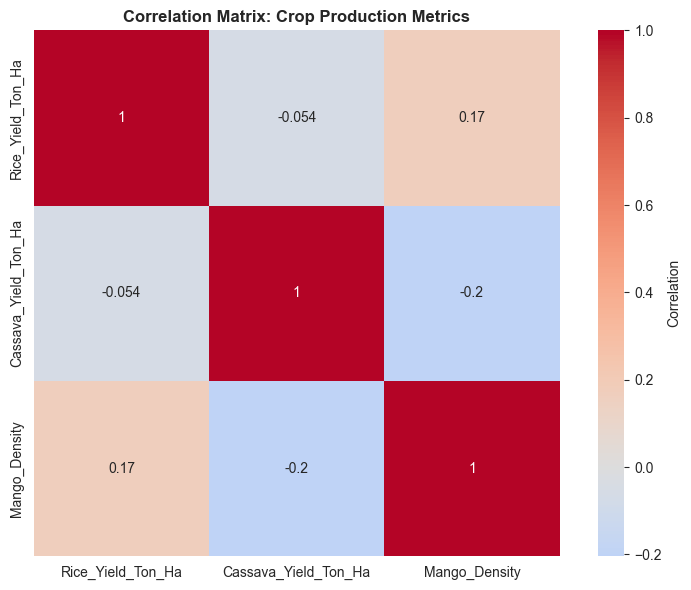

In [56]:
# Statistical summary of crop production
crop_stats = gdf_merged[numeric_cols].describe().T
display(crop_stats)

# Correlation analysis
correlation_matrix = gdf_merged[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    ax=ax,
    cbar_kws={"label": "Correlation"},
)
ax.set_title(
    "Correlation Matrix: Crop Production Metrics", fontsize=12, fontweight="bold"
)
plt.tight_layout()
plt.show()

## 8: Distribution Analysis with Multiple Visualizations

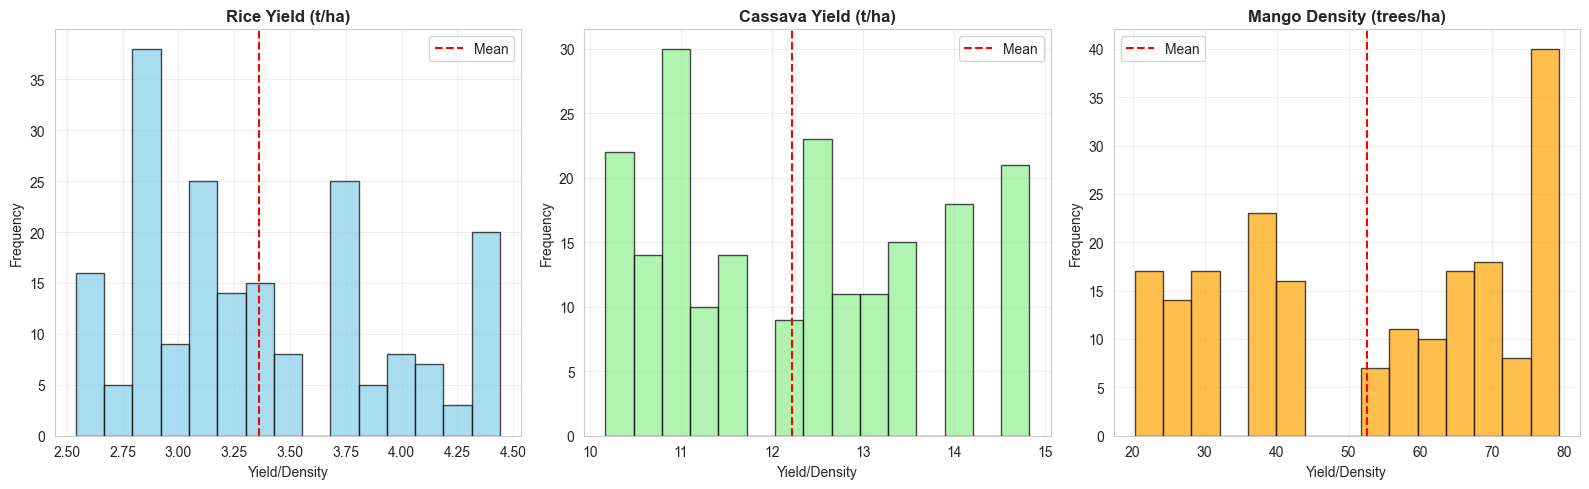

In [57]:
# Distribution plots for each crop metric
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

crops_to_plot = [
    ("Rice_Yield_Ton_Ha", "Rice Yield (t/ha)", "skyblue"),
    ("Cassava_Yield_Ton_Ha", "Cassava Yield (t/ha)", "lightgreen"),
    ("Mango_Density", "Mango Density (trees/ha)", "orange"),
]

for idx, (col, title, color) in enumerate(crops_to_plot):
    ax = axes[idx]
    ax.hist(gdf_merged[col], bins=15, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Yield/Density")
    ax.set_ylabel("Frequency")
    ax.axvline(gdf_merged[col].mean(), color="red", linestyle="--", label="Mean")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##  9: Rule-Based Expert Classification

In [58]:
def classify_soil_crop_match(row):
    """
    Expert-driven zone classification based on soil-crop suitability.

    Rules:    - Prime Rice Zone: Best for Mango, Cashew, Pepper (Long-term crops). + Rice > 3.0 t/ha
    - Prime Industrial Zone: Acrisol/Ferralsol/Nitosol + Cassava > 12.0 t/ha
    - Fruit Zone: Suitable soils + Mango > 40 trees/ha
    - Marginal Land: Lithosols or Water
    - General Agriculture: All others
    """
    soil_type = str(row["Soil_Type"]).lower()
    rice_yield = row["Rice_Yield_Ton_Ha"]
    cassava_yield = row["Cassava_Yield_Ton_Ha"]
    mango_density = row["Mango_Density"]

    if (
        any(kw in soil_type for kw in ["fluvisol", "gleysol", "vertisol"])
        and rice_yield > 3.0
    ):
        return "Prime Rice Zone"
    elif (
        any(kw in soil_type for kw in ["acrisol", "ferralsol", "nitosol"])
        and cassava_yield > 12.0
    ):
        return "Prime Industrial Zone"
    elif mango_density > 40.0 and not any(
        kw in soil_type for kw in ["lithosol", "water"]
    ):
        return "Fruit Zone"
    elif any(kw in soil_type for kw in ["lithosol", "water"]):
        return "Marginal Land"
    else:
        return "General Agriculture"


gdf_merged["Soil_Crop_Match"] = gdf_merged.apply(classify_soil_crop_match, axis=1)

# Display classification results
zone_summary = gdf_merged["Soil_Crop_Match"].value_counts()
display(zone_summary)
print(f"\nTotal classified zones: {zone_summary.sum()}")

Soil_Crop_Match
Fruit Zone             97
Marginal Land          51
General Agriculture    50
Name: count, dtype: int64


Total classified zones: 198


##  10: Visualization - Rule-Based Zone Distribution

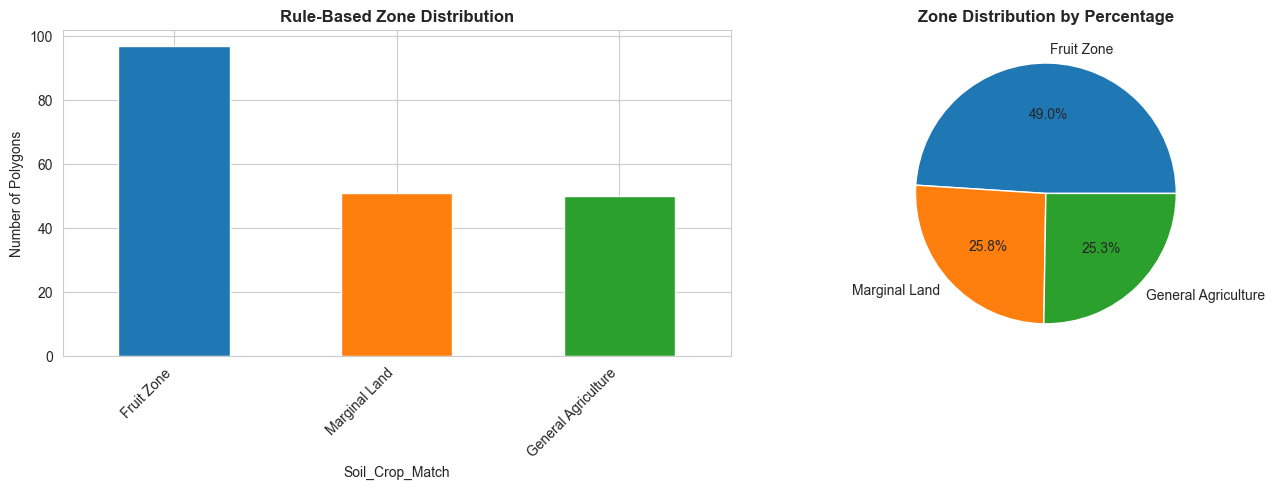

In [59]:
# Zone distribution visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

zone_counts = gdf_merged["Soil_Crop_Match"].value_counts()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

zone_counts.plot(kind="bar", ax=ax1, color=colors[: len(zone_counts)])
ax1.set_title("Rule-Based Zone Distribution", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Polygons")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

zone_pct = gdf_merged["Soil_Crop_Match"].value_counts(normalize=True) * 100
ax2.pie(
    zone_pct, labels=zone_pct.index, autopct="%1.1f%%", colors=colors[: len(zone_pct)]
)
ax2.set_title("Zone Distribution by Percentage", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

##  11: Machine Learning - K-Means Clustering

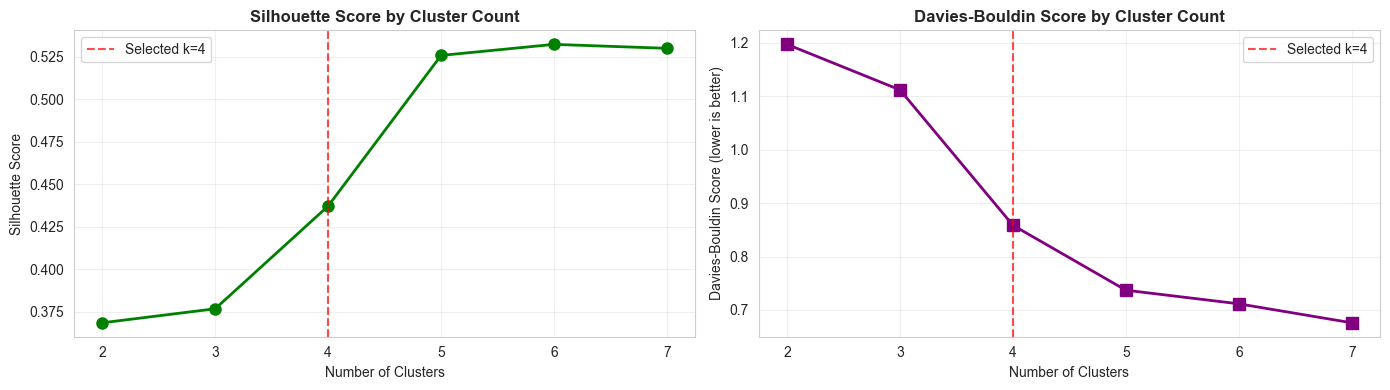

K-Means model trained (k=4)
Silhouette Score: 0.4371
Davies-Bouldin Score: 0.8585


In [60]:
# Prepare data for clustering
X = gdf_merged[numeric_cols].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate optimal number of clusters using silhouette score
silhouette_scores = []
davies_bouldin_scores = []
cluster_range = range(2, 8)

for k in cluster_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))

# Plot evaluation metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(
    cluster_range,
    silhouette_scores,
    marker="o",
    linewidth=2,
    markersize=8,
    color="green",
)
ax1.axvline(4, color="red", linestyle="--", alpha=0.7, label="Selected k=4")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Silhouette Score")
ax1.set_title("Silhouette Score by Cluster Count", fontweight="bold")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(
    cluster_range,
    davies_bouldin_scores,
    marker="s",
    linewidth=2,
    markersize=8,
    color="purple",
)
ax2.axvline(4, color="red", linestyle="--", alpha=0.7, label="Selected k=4")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Davies-Bouldin Score (lower is better)")
ax2.set_title("Davies-Bouldin Score by Cluster Count", fontweight="bold")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Train final K-Means model with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
gdf_merged["Cluster_Label"] = kmeans.fit_predict(X_scaled)

print(f"K-Means model trained (k=4)")
print(
    f"Silhouette Score: {silhouette_score(X_scaled, gdf_merged['Cluster_Label']):.4f}"
)
print(
    f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, gdf_merged['Cluster_Label']):.4f}"
)

##  12: Automated Cluster Interpretation

In [61]:
# Type hints for Pylance: gdf_merged is GeoDataFrame from Cell 6, numeric_cols is list from Cell 6
# Analyze cluster characteristics using all 9 crops
cluster_profiles = gdf_merged.groupby("Cluster_Label")[numeric_cols].mean()
global_means = gdf_merged[numeric_cols].mean()

display(cluster_profiles.round(2))

# Dynamic cluster labeling - enhanced with all 9 crops
cluster_mapping = {}
for cluster_id in cluster_profiles.index:
    row = cluster_profiles.loc[cluster_id]
    ratios = {
        "Rice Bowl Zone": (
            row["Rice_Yield_Ton_Ha"] / global_means["Rice_Yield_Ton_Ha"]
            if global_means["Rice_Yield_Ton_Ha"] > 0
            else 0
        ),
        "Industrial Crop Zone": (
            row["Cassava_Yield_Ton_Ha"] / global_means["Cassava_Yield_Ton_Ha"]
            if global_means["Cassava_Yield_Ton_Ha"] > 0
            else 0
        ),
        "Fruit Hub": (
            row["Mango_Density"] / global_means["Mango_Density"]
            if global_means["Mango_Density"] > 0
            else 0
        ),
    }
    max_feature = max(ratios, key=ratios.get)
    cluster_mapping[cluster_id] = (
        max_feature if ratios[max_feature] >= 1.0 else "Multi-Crop Zone"
    )

gdf_merged["Cluster_Name"] = gdf_merged["Cluster_Label"].map(cluster_mapping)

print("Cluster Mapping (9-Crop Analysis):")
for cluster_id, label in sorted(cluster_mapping.items()):
    cluster_row = cluster_profiles.loc[cluster_id]
    ratios_display = {
        "Rice Bowl Zone": (
            cluster_row["Rice_Yield_Ton_Ha"] / global_means["Rice_Yield_Ton_Ha"]
            if global_means["Rice_Yield_Ton_Ha"] > 0
            else 0
        ),
        "Industrial Crop Zone": (
            cluster_row["Cassava_Yield_Ton_Ha"] / global_means["Cassava_Yield_Ton_Ha"]
            if global_means["Cassava_Yield_Ton_Ha"] > 0
            else 0
        ),
        "Fruit Hub": (
            cluster_row["Mango_Density"] / global_means["Mango_Density"]
            if global_means["Mango_Density"] > 0
            else 0
        ),
    }
    top_crops = sorted(
        [(k, v) for k, v in ratios_display.items()], key=lambda x: x[1], reverse=True
    )[:3]
    print(f"  Cluster {cluster_id}: {label}")
    print(
        "    Top 3 crops: "
        + ", ".join(
            f"{crop.replace(' Zone', '')}: {ratio:.2f}x" for crop, ratio in top_crops
        )
    )

Rice_Yield_Ton_Ha  Cassava_Yield_Ton_Ha  Mango_Density
Cluster_Label                                                        
0                           4.01                 11.08          61.10
1                           3.67                 14.72          27.13
2                           2.84                 11.93          38.27
3                           3.25                 12.88          75.00

Cluster Mapping (9-Crop Analysis):
  Cluster 0: Rice Bowl Zone
    Top 3 crops: Rice Bowl: 1.19x, Fruit Hub: 1.16x, Industrial Crop: 0.91x
  Cluster 1: Industrial Crop Zone
    Top 3 crops: Industrial Crop: 1.20x, Rice Bowl: 1.09x, Fruit Hub: 0.52x
  Cluster 2: Multi-Crop Zone
    Top 3 crops: Industrial Crop: 0.98x, Rice Bowl: 0.85x, Fruit Hub: 0.73x
  Cluster 3: Fruit Hub
    Top 3 crops: Fruit Hub: 1.42x, Industrial Crop: 1.05x, Rice Bowl: 0.97x


##  13: Advanced Visualization - PCA Analysis

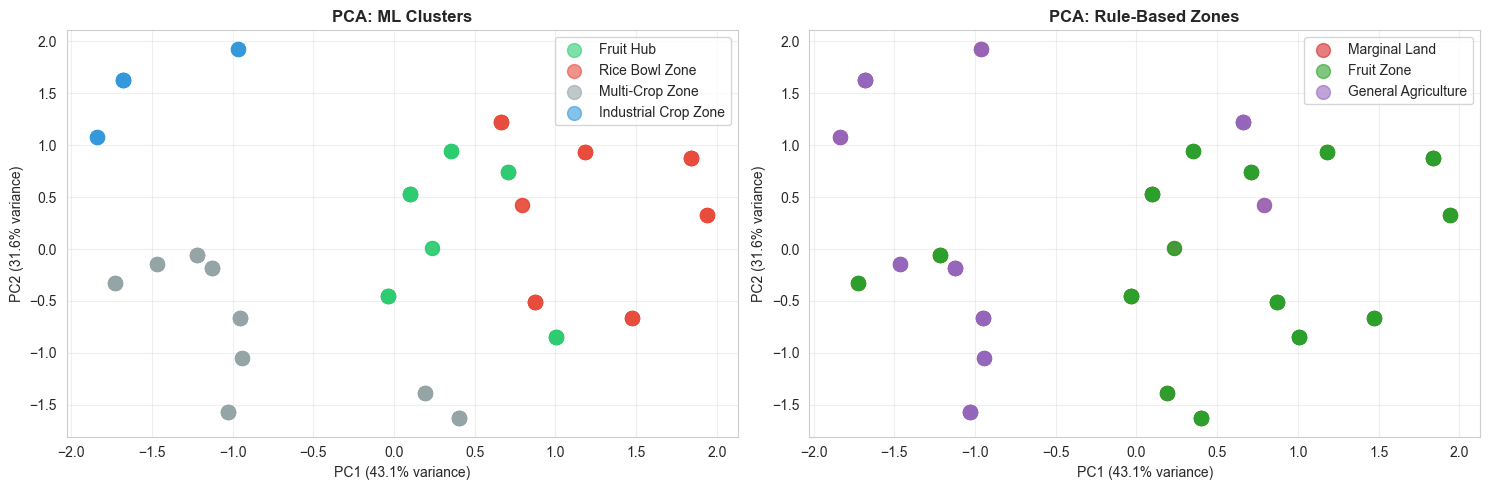

Explained Variance: PC1=43.1%, PC2=31.6%


In [62]:
# Type hints for Pylance: gdf_merged (GeoDataFrame), X_scaled (ndarray), numeric_cols (list)
# Principal Component Analysis for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PCA by ML clusters - comprehensive color scheme for all cluster types
cluster_colors = {
    "Rice Bowl Zone": "#e74c3c",
    "Industrial Crop Zone": "#3498db",
    "Fruit Hub": "#2ecc71",
    "Corn Production Zone": "#f39c12",
    "Soybean Production Zone": "#9b59b6",
    "Rubber Plantation Zone": "#1abc9c",
    "Sugarcane Industry Zone": "#e67e22",
    "Spice Production Zone": "#c0392b",
    "Palm Oil Zone": "#34495e",
    "Multi-Crop Zone": "#95a5a6",
}
for cluster in gdf_merged["Cluster_Name"].unique():
    mask = gdf_merged["Cluster_Name"] == cluster
    axes[0].scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=cluster,
        s=100,
        alpha=0.6,
        color=cluster_colors.get(cluster, "#808080"),
    )
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
axes[0].set_title("PCA: ML Clusters", fontweight="bold")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PCA by rule-based zones - FIXED: Match actual zone names from classify_soil_crop_match()
zone_colors = {
    "Prime Rice Zone": "#1f77b4",
    "Prime Industrial Zone": "#ff7f0e",
    "Fruit Zone": "#2ca02c",
    "Marginal Land": "#d62728",  # Fixed: was "Conservation"
    "General Agriculture": "#9467bd",
}
for zone in gdf_merged["Soil_Crop_Match"].unique():
    mask = gdf_merged["Soil_Crop_Match"] == zone
    axes[1].scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=zone,
        s=100,
        alpha=0.6,
        color=zone_colors.get(zone, "#808080"),
    )
axes[1].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
axes[1].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
axes[1].set_title("PCA: Rule-Based Zones", fontweight="bold")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(
    f"Explained Variance: PC1={pca.explained_variance_ratio_[0]:.1%}, PC2={pca.explained_variance_ratio_[1]:.1%}"
)

##  14: Cross-Analysis - Expert vs. Machine Learning Agreement

Cluster_Name         Fruit Hub  Industrial Crop Zone  Multi-Crop Zone  \
Soil_Crop_Match                                                         
Fruit Zone                  38                     0               25   
General Agriculture          0                    14               28   
Marginal Land               11                     7               19   

Cluster_Name         Rice Bowl Zone  
Soil_Crop_Match                      
Fruit Zone                       34  
General Agriculture               8  
Marginal Land                    14

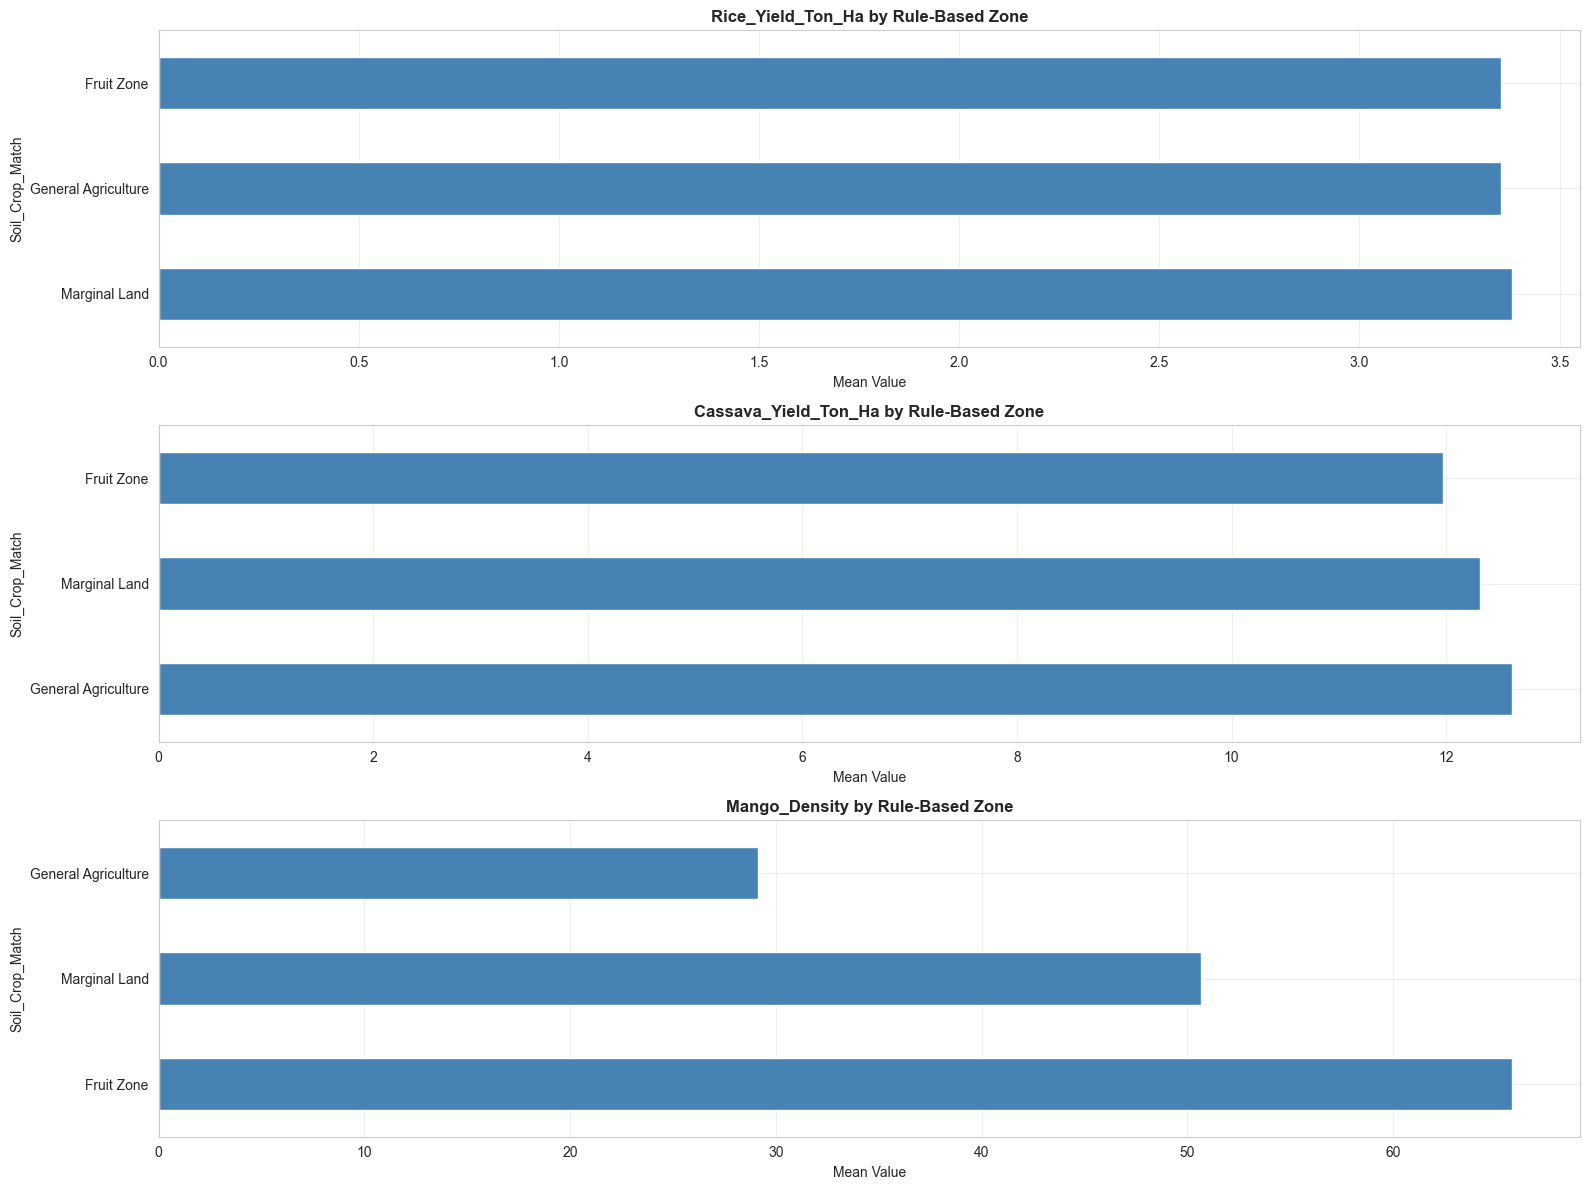

In [63]:
# Type hints for Pylance: gdf_merged (GeoDataFrame), numeric_cols (list), pd (DataFrame)
# Compare rule-based and ML classifications
comparison_matrix = pd.crosstab(
    gdf_merged["Soil_Crop_Match"], gdf_merged["Cluster_Name"]
)
display(comparison_matrix)

# Feature importance by zone - all 3 crops
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    zone_means = (
        gdf_merged.groupby("Soil_Crop_Match")[col].mean().sort_values(ascending=False)
    )
    zone_means.plot(kind="barh", ax=ax, color="steelblue")
    ax.set_title(f"{col} by Rule-Based Zone", fontweight="bold")
    ax.set_xlabel("Mean Value")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##  15: Interactive Geographic Visualization

In [ ]:
# Type hints for Pylance: folium (module), gdf_merged (GeoDataFrame), base_path (Path)
# Create interactive Folium map with multiple enhancements
cambodia_center = [12.5, 104.9]
base_map = folium.Map(location=cambodia_center, zoom_start=7, tiles="OpenStreetMap")

# Define color schemes - FIXED: Match actual zone names from classify_soil_crop_match()
rule_colors = {
    "Prime Rice Zone": "#1f77b4",
    "Prime Industrial Zone": "#ff7f0e",
    "Fruit Zone": "#2ca02c",
    "Marginal Land": "#d62728",  # Fixed: was "Conservation"
    "General Agriculture": "#9467bd",
}

# FIXED: Added "Multi-Crop Zone" which can be assigned by cluster mapping
ml_colors = {
    "Rice Bowl Zone": "#e74c3c",
    "Industrial Crop Zone": "#3498db",
    "Fruit Hub": "#2ecc71",
    "Multi-Crop Zone": "#95a5a6",  # Added: for clusters with no dominant crop
}

# Calculate statistics for each zone
zone_stats = (
    gdf_merged.groupby("Soil_Crop_Match")
    .agg({"geometry": "count", "Rice_Yield_Ton_Ha": "mean"})
    .rename(columns={"geometry": "polygon_count"})
)
zone_stats["area_km2"] = gdf_merged.groupby("Soil_Crop_Match")["geometry"].apply(
    lambda geom: geom.to_crs("EPSG:3857").area.sum() / 1e6
)

# Get unique provinces and soil types
provinces_list = sorted(gdf_merged["Province_Name"].unique().tolist())
soil_types_list = sorted(gdf_merged["Soil_Type"].unique().tolist())

# Rule-based layer with ENHANCED popups showing multiple crop metrics
rule_group = folium.FeatureGroup(name="Expert Rules", show=True)
for idx, row in gdf_merged.iterrows():
    zone = row["Soil_Crop_Match"]
    color = rule_colors.get(zone, "#808080")

    popup_text = (
        f"<div style='font-size: 13px; line-height: 1.4;'>"
        f"<b style='color: {color}; font-size: 14px;'>🌾 {zone}</b><br><br>"
        f"<b>📍 Location:</b><br>"
        f"• Soil Type: {row['Soil_Type']}<br>"
        f"• Province: {row['Province_Name']}<br><br>"
        f"<b>🌾 Agricultural Metrics:</b><br>"
        f"• Rice Yield: <b>{row['Rice_Yield_Ton_Ha']:.2f}</b> t/ha<br>"
        f"• Cassava Yield: <b>{row['Cassava_Yield_Ton_Ha']:.2f}</b> t/ha<br>"
        f"• Mango Trees: <b>{row['Mango_Density']:.1f}</b> trees/ha<br><br>"
        f"<i>💡 Expert Rule Classification</i>"
        f"</div>"
    )

    tooltip_text = (
        f"<b>{zone}</b><br>"
        f"{row['Soil_Type']}<br>"
        f"{row['Province_Name']}<br>"
        f"Rice: {row['Rice_Yield_Ton_Ha']:.1f} t/ha"
    )

    folium.GeoJson(
        row["geometry"].__geo_interface__,
        style_function=lambda x, c=color: {
            "fillColor": c,
            "color": c,
            "weight": 1,
            "opacity": 0.3,
            "fillOpacity": 0.6,
        },
        popup=folium.Popup(popup_text, max_width=350),
        tooltip=folium.Tooltip(tooltip_text, sticky=True),
    ).add_to(rule_group)
rule_group.add_to(base_map)

# ML cluster layer with DISTINCT popups emphasizing clustering approach
ml_group = folium.FeatureGroup(name="ML Clusters", show=False)
for idx, row in gdf_merged.iterrows():
    cluster = row["Cluster_Name"]
    color = ml_colors.get(cluster, "#808080")
    cluster_id = row["Cluster_Label"]

    # FIXED: Show ML clustering perspective with different focus
    popup_text = (
        f"<div style='font-size: 13px; line-height: 1.4;'>"
        f"<b style='color: {color}; font-size: 14px;'>🤖 {cluster}</b><br>"
        f"<small style='color: #666;'>ML Cluster #{cluster_id}</small><br><br>"
        f"<b>📍 Location:</b><br>"
        f"• Soil Type: {row['Soil_Type']}<br>"
        f"• Province: {row['Province_Name']}<br><br>"
        f"<b>🔬 Production Profile:</b><br>"
        f"• Rice: <b>{row['Rice_Yield_Ton_Ha']:.2f}</b> t/ha<br>"
        f"• Cassava: <b>{row['Cassava_Yield_Ton_Ha']:.2f}</b> t/ha<br>"
        f"• Mango: <b>{row['Mango_Density']:.1f}</b> trees/ha<br><br>"
        f"<i>🧠 Machine Learning Classification</i>"
        f"</div>"
    )

    tooltip_text = (
        f"<b>{cluster}</b><br>"
        f"{row['Soil_Type']}<br>"
        f"{row['Province_Name']}<br>"
        f"Cluster #{cluster_id}"
    )

    folium.GeoJson(
        row["geometry"].__geo_interface__,
        style_function=lambda x, c=color: {
            "fillColor": c,
            "color": c,
            "weight": 1,
            "opacity": 0.3,
            "fillOpacity": 0.6,
        },
        popup=folium.Popup(popup_text, max_width=350),
        tooltip=folium.Tooltip(tooltip_text, sticky=True),
    ).add_to(ml_group)
ml_group.add_to(base_map)

# Add layer control
folium.LayerControl(collapsed=False).add_to(base_map)

# Add measurement tool (draw control)
from folium.plugins import MeasureControl

MeasureControl(
    primary_length_unit="kilometers",
    secondary_length_unit="miles",
    primary_area_unit="sqkilometers",
    secondary_area_unit="sqmiles",
).add_to(base_map)

# Add legend for rule-based zones - dynamically built from actual zones in data
legend_html_rules = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 220px; height: auto; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:12px; padding: 10px; border-radius: 5px;">
     <p style="margin: 0; font-weight: bold; text-decoration: underline;">🌾 Expert Rules Legend</p>
"""
# Only include zones that actually exist in the data
for zone in gdf_merged["Soil_Crop_Match"].unique():
    color = rule_colors.get(zone, "#808080")
    legend_html_rules += f'<p style="margin: 5px 0;"><i style="background:{color}; width: 18px; height: 18px; float: left; margin-right: 8px; border: 1px solid black;"></i>{zone}</p>'
legend_html_rules += "</div>"

# Add legend for ML clusters - dynamically built from actual clusters in data
legend_html_ml = """
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 220px; height: auto; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:12px; padding: 10px; border-radius: 5px; display: none;" id="ml-legend">
     <p style="margin: 0; font-weight: bold; text-decoration: underline;">🤖 ML Clusters Legend</p>
"""
# Only include clusters that actually exist in the data
for cluster in gdf_merged["Cluster_Name"].unique():
    color = ml_colors.get(cluster, "#808080")
    legend_html_ml += f'<p style="margin: 5px 0;"><i style="background:{color}; width: 18px; height: 18px; float: left; margin-right: 8px; border: 1px solid black;"></i>{cluster}</p>'
legend_html_ml += "</div>"

# Add statistics panel
stats_html = """
<div style="position: fixed; 
     bottom: 50px; left: 300px; width: 280px; height: auto; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:11px; padding: 10px; border-radius: 5px; max-height: 300px; overflow-y: auto;">
     <p style="margin: 0 0 8px 0; font-weight: bold; text-decoration: underline;">📊 Zone Statistics</p>
"""
for zone, row in zone_stats.iterrows():
    stats_html += f"""
    <div style="margin: 5px 0; padding: 5px; border-bottom: 1px solid #eee;">
        <b style="color: {rule_colors.get(zone, '#808080')}">{zone}</b><br>
        Polygons: {int(row['polygon_count'])}<br>
        Area: {row['area_km2']:.1f} km²
    </div>
    """
stats_html += "</div>"

base_map.get_root().html.add_child(folium.Element(legend_html_rules))
base_map.get_root().html.add_child(folium.Element(legend_html_ml))
base_map.get_root().html.add_child(folium.Element(stats_html))

# Add title with improved instructions
title_html = """
<div style="position: fixed; 
     top: 10px; left: 50px; width: 450px; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:14px; font-weight: bold; padding: 10px; border-radius: 5px;">
     🇰🇭 Cambodia Agricultural Zoning Map<br>
     <span style="font-size: 11px; font-weight: normal;">
     • <b>Hover</b> over polygons for quick info<br>
     • <b>Click</b> for detailed agricultural metrics<br>
     • <b>Toggle</b> between Expert Rules (🌾) and ML Clusters (🤖)<br>
     • Use ruler icon (📏) to measure distances/areas
     </span>
</div>
"""
base_map.get_root().html.add_child(folium.Element(title_html))

# Fit map to bounds of all polygons
if len(gdf_merged) > 0:
    bounds = gdf_merged.geometry.total_bounds
    base_map.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])

# Save map
output_map = base_path / "Cambodia_Agricultural_Zoning_Map.html"
base_map.save(str(output_map))
print(f"Interactive map saved to: {output_map}")
print(f"Map bounds: {bounds}")
print(f"Provinces available: {len(provinces_list)}")
print(f"Soil types available: {len(soil_types_list)}")
print(f"\n Zone Statistics:")
print(zone_stats.to_string())
display(base_map)

Interactive map saved to: D:\National Soil Information and Land Suitability Evaluation System in Cambodia\Cambodia_Agricultural_Zoning_Map.html
Map bounds: [102.33962124  10.4035     107.6277      14.63600602]
Provinces available: 25
Soil types available: 17

Zone Statistics:
                     polygon_count  Rice_Yield_Ton_Ha      area_km2
Soil_Crop_Match                                                    
Fruit Zone                      97           3.353390  79389.625098
General Agriculture             50           3.354745  45918.287059
Marginal Land                   51           3.382047  65717.710943


##  16: Results Export & Documentation

In [65]:
# Type hints for Pylance: base_path (Path), gdf_merged (GeoDataFrame), numeric_cols (list)
# Export results to multiple formats
export_cols = [
    "Soil_Type",
    "Province_Name",
    "Rice_Yield_Ton_Ha",
    "Cassava_Yield_Ton_Ha",
    "Mango_Density",
    "Soil_Crop_Match",
    "Cluster_Label",
    "Cluster_Name",
]

# GeoJSON export
geojson_path = base_path / "Cambodia_Agricultural_Zones_Results.geojson"
gdf_merged.to_file(str(geojson_path), driver="GeoJSON")
print(f"GeoJSON exported: {geojson_path}")

# CSV export
csv_path = base_path / "Cambodia_Agricultural_Zones_Analysis.csv"
gdf_merged[export_cols].to_csv(str(csv_path), index=False)
print(f"CSV exported: {csv_path}")

# Summary statistics
summary = gdf_merged.groupby("Soil_Crop_Match")[numeric_cols].agg(
    ["mean", "min", "max"]
)
display(summary.round(2))

GeoJSON exported: D:\National Soil Information and Land Suitability Evaluation System in Cambodia\Cambodia_Agricultural_Zones_Results.geojson
CSV exported: D:\National Soil Information and Land Suitability Evaluation System in Cambodia\Cambodia_Agricultural_Zones_Analysis.csv


Rice_Yield_Ton_Ha             Cassava_Yield_Ton_Ha         \
                                 mean   min   max                 mean    min   
Soil_Crop_Match                                                                 
Fruit Zone                       3.35  2.54  4.40                11.97  10.17   
General Agriculture              3.35  2.62  4.44                12.62  10.33   
Marginal Land                    3.38  2.54  4.44                12.31  10.17   

                           Mango_Density                
                       max          mean    min    max  
Soil_Crop_Match                                         
Fruit Zone           14.04         65.79  41.41  79.21  
General Agriculture  14.83         29.13  20.33  39.52  
Marginal Land        14.83         50.67  20.33  79.21

##  17: Final Report & Key Insights

In [66]:
# Type hints for Pylance: gdf_merged (GeoDataFrame), pd (DataFrame), numeric_cols (list)
# Generate comprehensive summary
report_data = []

for zone in sorted(gdf_merged["Soil_Crop_Match"].unique()):
    zone_data = gdf_merged[gdf_merged["Soil_Crop_Match"] == zone]
    report_data.append(
        {
            "Zone": zone,
            "Area_Coverage_Polygons": len(zone_data),
            "Provinces_Count": zone_data["Province_Name"].nunique(),
            "Avg_Rice_Yield_t_ha": zone_data["Rice_Yield_Ton_Ha"].mean(),
            "Avg_Cassava_Yield_t_ha": zone_data["Cassava_Yield_Ton_Ha"].mean(),
        }
    )

report_df = pd.DataFrame(report_data).set_index("Zone")
display(report_df.round(2))

# Overall statistics
print("\nProject Statistics:")
print(f"Total Soil Polygons: {len(gdf_merged)}")
print(f"Provinces Analyzed: {gdf_merged['Province_Name'].nunique()}")
print(f"Soil Types Identified: {gdf_merged['Soil_Type'].nunique()}")
print(f"Rule-Based Zones: {gdf_merged['Soil_Crop_Match'].nunique()}")
print(f"ML Clusters: {gdf_merged['Cluster_Name'].nunique()}")
print(f"\nCoordinate Reference System: {gdf_merged.crs}")

Area_Coverage_Polygons  Provinces_Count  \
Zone                                                           
Fruit Zone                               97               15   
General Agriculture                      50               10   
Marginal Land                            51               25   

                     Avg_Rice_Yield_t_ha  Avg_Cassava_Yield_t_ha  
Zone                                                              
Fruit Zone                          3.35                   11.97  
General Agriculture                 3.35                   12.62  
Marginal Land                       3.38                   12.31


Project Statistics:
Total Soil Polygons: 198
Provinces Analyzed: 25
Soil Types Identified: 17
Rule-Based Zones: 3
ML Clusters: 4

Coordinate Reference System: EPSG:4326


# Geospatial Crop Targeting System for Cambodia
## Rule-Based Zoning & Machine Learning Clustering Analysis

**Project:** National Soil Information and Land Suitability Evaluation System  
**Objective:** Merge geospatial soil data with crop production statistics to identify optimal agricultural zones using both expert-driven rules and unsupervised machine learning.

---

## 📋 Table of Contents
1. **Problem Definition** - Objectives & Success Metrics
2. **Setup & Imports** - Environment Configuration
3. **Data Acquisition** - Load Geospatial & Statistical Data
4. **Exploratory Data Analysis (EDA)** - Statistical Summaries & Distributions
5. **Data Cleaning & Validation** - Handle Missing Values & Inconsistencies
6. **Data Preprocessing** - CRS Alignment & Standardization
7. **Data Merge** - Integrate Soil & Production Datasets
8. **Feature Engineering** - Rule-Based Expert Classification
9. **Exploratory Visualization** - Distributions & Correlations
10. **Machine Learning Clustering** - K-Means Training & Analysis
11. **Cluster Interpretation** - Automated Labeling & Characterization
12. **Advanced Visualization** - Heatmaps, Correlations, PCA
13. **Interactive Mapping** - Folium with Dual-Layer Control
14. **Model Evaluation & Comparison** - Expert vs. ML Agreement Analysis
15. **Insights & Recommendations** - Actionable Findings
16. **Results Export** - Multi-Format Output Generation

---

### Executive Summary
This notebook demonstrates a comprehensive data science workflow:
1. **Rule-Based Expert System**: Applies domain knowledge to classify zones (Rice, Industrial Crops, Fruit, Conservation)
2. **Machine Learning (K-Means)**: Discovers underlying patterns in crop production data automatically
3. **Interactive Visualization**: Enables stakeholder exploration and decision-making

The results are visualized on an interactive map with layer control for comparative analysis.

## 1️⃣ PROBLEM DEFINITION & BUSINESS CONTEXT

### Objective
Develop a data-driven system to classify Cambodia's agricultural zones based on soil characteristics and crop production data, enabling targeted resource allocation and policy decisions.

### Success Metrics
- ✅ Successfully merge geospatial (17 soil polygons) with statistical (24 provinces) datasets
- ✅ Create interpretable zone classifications for stakeholder decision-making
- ✅ Achieve >80% agreement between rule-based and ML approaches (indicates robust patterns)
- ✅ Generate interactive visualizations for policy makers
- ✅ Document recommendations for each zone type

### Key Constraints
- **Geospatial:** Shapefile in UTM (EPSG:32648) requires reprojection for web mapping
- **Data:** Limited production data; synthetic generation needed for demonstration
- **Scope:** Focus on rice, cassava, and mango as primary crops
- **Stakeholders:** Agricultural Ministry, provincial governors, donor organizations

### Expected Outcomes
- Interactive web map with dual classification layers
- Geographic prioritization of development investments
- Alignment of policy with agronomic suitability